# Interpolation

Interpolation means to fill in a function between known values.  The data for interpolation are a set of points `x` and a set of function values `y`, and the result is a function `f` from some function class so that `f(x) = y`.  Typically this function class is something simple, like Polynomials of bounded degree, piecewise constant functions, or splines.

Let's look at a few examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here are a couple of functions we'll look at:

In [2]:
fs = [
    lambda x : (x - 3) * (x + 3) * x, # cubic
    lambda x : np.exp(-x**2 / 2),     # gaussian
    lambda x : np.sin(3*x) / (3*x),       # sinc function
    lambda x : 1 / (np.exp(-2*x) + 1)   # logistic
]

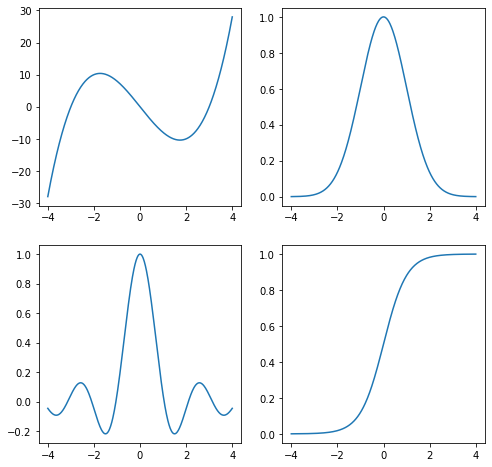

In [3]:
x = np.linspace(-4,4,500)

fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax = ax.flatten()

for i, f in enumerate(fs):
    y = f(x)
    ax[i].plot(x, y)
    
plt.show(fig)

If we sample a couple of points on each function, we would see something like the following:

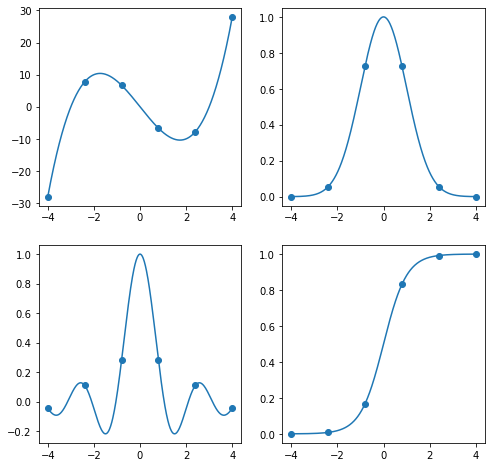

In [5]:
x = np.linspace(-4,4,500)
x6 = np.linspace(-4,4,6)

fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax = ax.flatten()

for i, f in enumerate(fs):
    y = f(x)
    ax[i].plot(x, y)
    
    y = f(x6)
    ax[i].scatter(x6, y)
    
plt.show(fig)

An interpolation just uses the sampled points and function values to try to reconstruct the original function.

Scipy provides a high-level interface for doing this with [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).  You can pass in a variety of arguments, and the output is an interpolation object, which implements the `__call__` method, so you can evaluate the interpolation.

In [6]:
from scipy.interpolate import interp1d

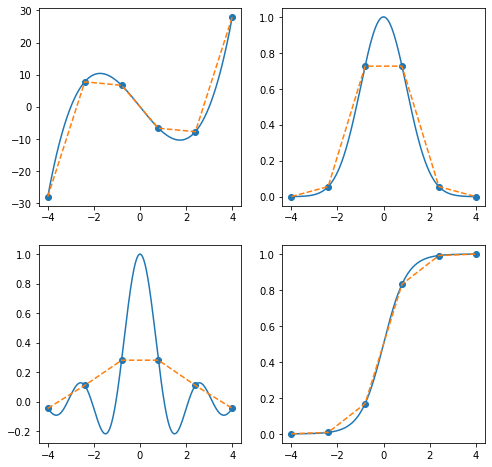

In [7]:
x = np.linspace(-4,4,500)
xk = np.linspace(-4,4,6)

fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax = ax.flatten()

for i, f in enumerate(fs):
    y = f(x)
    ax[i].plot(x, y)
    
    yk = f(xk)
    ax[i].scatter(xk, yk)
    
    interp = interp1d(xk, yk, kind='linear')
    ax[i].plot(x, interp(x), '--')
    
    
    
plt.show(fig)

If we increase the number of points used for interpolation, then we can get better approximations to the function.

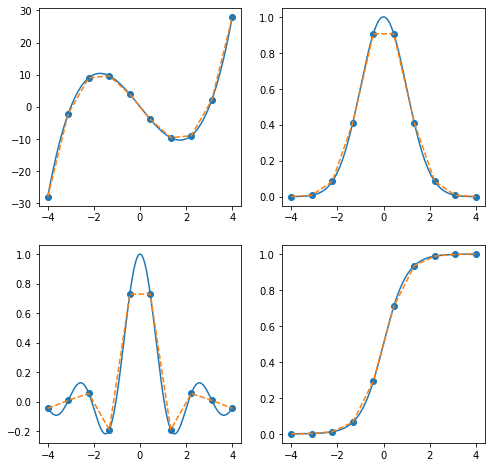

In [8]:
x = np.linspace(-4,4,500)
xk = np.linspace(-4,4,10)

fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax = ax.flatten()

for i, f in enumerate(fs):
    y = f(x)
    ax[i].plot(x, y)
    
    yk = f(xk)
    ax[i].scatter(xk, yk)
    
    interp = interp1d(xk, yk, kind='linear')
    ax[i].plot(x, interp(x), '--')
    
    
    
plt.show(fig)

There are a variety of options for the `kind` keyword. 
* `kind='linear'`: piecewise linear interpolation
* `kind='nearest'`: nearest-neighbor interpolation (piecewise constant)
* `kind='quadratic'`: quadratic spline (piecewise quadratic)
* `kind='cubic'`:  cubic spline (piecewise cubic)

and more.  See the documentation for details

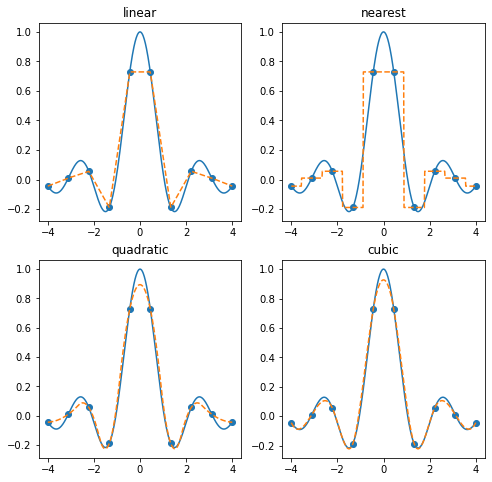

In [9]:
kinds = ('linear', 'nearest', 'quadratic', 'cubic')
f = fs[2]

x = np.linspace(-4,4,500)
xk = np.linspace(-4,4,10)

fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax = ax.flatten()

for i, kind in enumerate(kinds):
    y = f(x)
    ax[i].plot(x, y)
    
    yk = f(xk)
    ax[i].scatter(xk, yk)
    
    interp = interp1d(xk, yk, kind=kind)
    ax[i].plot(x, interp(x), '--')
    ax[i].set_title(kind)
    
    
    
plt.show(fig)


## Barycentric Interpolation

There are also several interpolation methods not covered by `interp1d`, or which offer more customization.  These include:
* `BarycentricInterpolator`
* `KroghInterpolator`
* `PchipInterpolator`

and so on.  See the [interpolation documentation](https://docs.scipy.org/doc/scipy/reference/interpolate.html) for more.

Barycentric interpolation can be done using [`BarycentricInterpolator`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BarycentricInterpolator.html#scipy.interpolate.BarycentricInterpolator), which constructs a Lagrange Polynomial of minimum degree which interpolates the points.

See [Berrut and Trefethen, 2004](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) for details.



In [10]:
from scipy.interpolate import BarycentricInterpolator

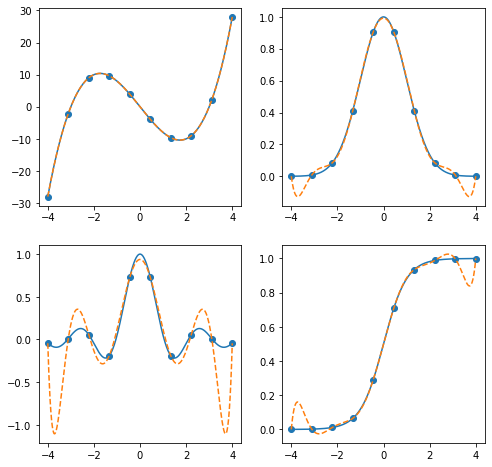

In [11]:
x = np.linspace(-4,4,500)
xk = np.linspace(-4,4,10)

fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax = ax.flatten()

for i, f in enumerate(fs):
    y = f(x)
    ax[i].plot(x, y)
    
    yk = f(xk)
    ax[i].scatter(xk, yk)
    
    interp = BarycentricInterpolator(xk, yk)
    ax[i].plot(x, interp(x), '--')
    
    
    
plt.show(fig)

a big difference between a Barycentric interpolator and the sorts of interpolants you contruct using `interp1d` is that it is not defined piecewise - it is a degree `k-1` polynomial which fits each of the `k` interpolation points exactly.  If the function being interpolated is not a lower-degree polynomial, this can lead to large fluctuations away from the origin, which is called the Runge phenomenon.

You can minimize the effects of the Runge phenomenon by using Chebyshev interpolation points: `cos(i*np.pi/(k-1))`, `i=0,...,k-1`

In [12]:
def chebyshev(k, scale=1):
    """
    return k Chebyshev interpolation points in the range [-scale, scale]
    """
    return scale*np.cos(np.arange(k) * np.pi / (k-1))

In [13]:
xk = chebyshev(5, scale=4)
xk

array([ 4.00000000e+00,  2.82842712e+00,  2.44929360e-16, -2.82842712e+00,
       -4.00000000e+00])

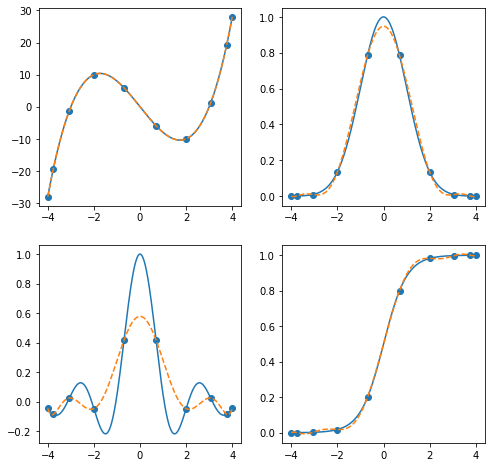

In [14]:
x = np.linspace(-4,4,500)
xk = chebyshev(10, scale=4)

fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax = ax.flatten()

for i, f in enumerate(fs):
    y = f(x)
    ax[i].plot(x, y)
    
    yk = f(xk)
    ax[i].scatter(xk, yk)
    
    interp = BarycentricInterpolator(xk, yk)
    ax[i].plot(x, interp(x), '--')
    
    
plt.show(fig)

## Higher-Dimensional Interpolation

Higher dimensional interpolations can be computed using either [`scipy.interpolate.interp2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d) (for 2-dimensions), or [`scipy.interpolate.griddata`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html#scipy.interpolate.griddata) (for any number of dimensions).  There are also a variety of more specific options which you can find in [the documentation](https://docs.scipy.org/doc/scipy/reference/interpolate.html).

The following function is found in the [SciPy interpolation tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html#multivariate-data-interpolation-griddata)


In [14]:
f = lambda x, y : x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

We'll want to interpolate onto a grid covering the unit square.  The following two cells generate equivalent data:

In [15]:
gx, gy = np.mgrid[0:1:100j, 0:1:100j]

In [16]:
gx, gy = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))

We'll sample the function at some random points

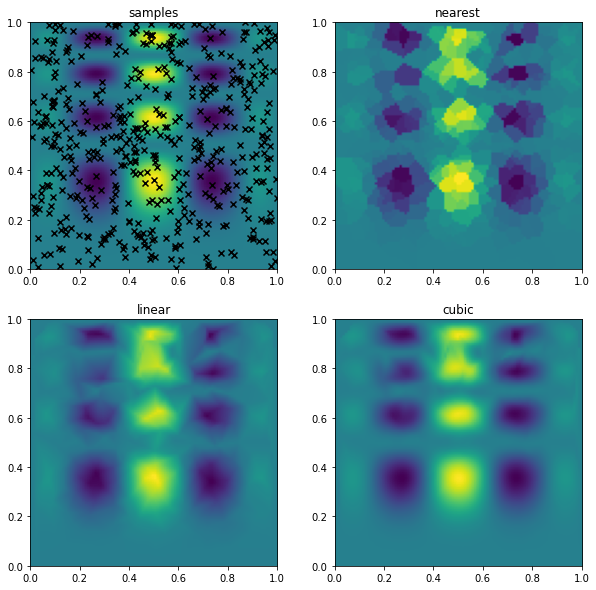

In [17]:
from scipy.interpolate import griddata

n = 500
x = np.random.rand(n, 2)
z = f(x[:,0], x[:,1])

fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax = ax.flatten()

# keyword arguments for imshow
imkw = {'extent': (0,1,0,1), 'origin': 'lower'}

ax[0].scatter(x[:,0], x[:,1], marker='x', color='k')
ax[0].imshow(f(gx, gy), **imkw)
ax[0].set_title('samples')

for i, method in enumerate(['nearest', 'linear', 'cubic']):
    grid_interpolation = griddata(x, z, (gx, gy), method=method, fill_value=0)
    ax[i+1].imshow(grid_interpolation, **imkw)
    ax[i+1].set_title(method)

    
    
plt.show(fig)

`interp2d` should be used with a grid of points both when fitting the interpolant and when evaluating

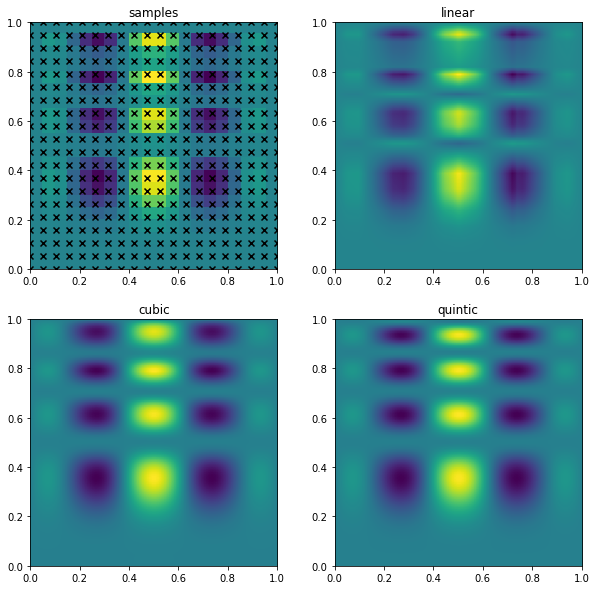

In [18]:
from scipy.interpolate import interp2d

gx, gy = np.mgrid[0:1:20j, 0:1:20j]
z = f(gx, gy)

fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax = ax.flatten()

# keyword arguments for imshow
imkw = {'extent': (0,1,0,1), 'origin': 'lower'}

ax[0].scatter(gx.flatten(), gy.flatten(), marker='x', color='k')
ax[0].imshow(z.T, **imkw)
ax[0].set_title('samples')

for i, method in enumerate(['linear', 'cubic', 'quintic']):
    interp = interp2d(gx, gy, z, kind=method, fill_value=0)
    grid_interpolation = interp(np.linspace(0,1,100), np.linspace(0,1,100))
    ax[i+1].imshow(grid_interpolation, **imkw)
    ax[i+1].set_title(method)

    
    
plt.show(fig)